In [1]:
# brew install graphviz
# pip install graphviz
from graphviz import Digraph
from IPython.display import display


In [2]:
from micrograd.engine import Value

In [3]:

# Function to visualize computation graph with operators as separate nodes
def visualize_graph(node, graph=None):
    if graph is None:
        graph = Digraph(format='svg',graph_attr={'rankdir': 'LR'})
        graph.attr(dpi='70')  # Higher quality image

    node_id = str(id(node))  # Unique identifier for each node
    graph.node(node_id, str(node.label)+": "+str(node.data) + " | grad:"+str(round(float(node.grad), 4)), shape="record", style="filled", fillcolor="lightblue")

    # If there's an operation, create a separate operator node
    if node.operator:
        op_id = node_id + "_op"  # Unique ID for operator node
        graph.node(op_id, node.operator, shape="circle", style="filled", fillcolor="orange")
        graph.edge(op_id, node_id)  # Operator points to the result

        # Connect children to operator node instead of directly to the result
        for child in node.prev:
            child_id = str(id(child))
            graph.node(child_id, str(child.data), shape="record", style="filled", fillcolor="lightgray")
            graph.edge(child_id, op_id)  # Connect child to operator

            # Recursively add child nodes
            visualize_graph(child, graph)

    return graph


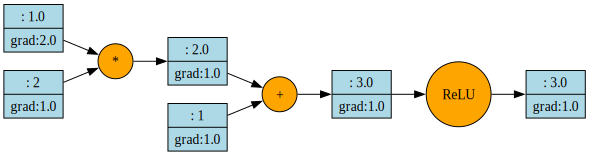

In [4]:
# a very simple example
x = Value(1.0)
y = (x * 2 + 1).relu()

y.backprop()
graph = visualize_graph(y)
display(graph)


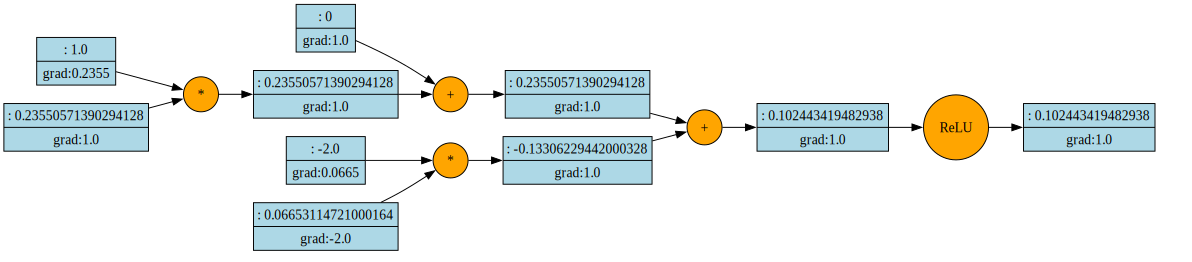

In [5]:
# a simple 2D neuron
import random
from micrograd import nn

random.seed(1337)
n = nn.Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backprop()
graph = visualize_graph(y)
display(graph)


In [6]:
graph.render('gout')

'gout.svg'